In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.exceptions.ComplexWarning) #flavio creates a ComplexWarning each time it computes the CKM elements

from formulas.alp_decays import *
from formulas.meson_semilep_decays import *
from formulas.meson_leptonic import BR_Bs_int, BR_Bs_quad, BR_KL_quad
from formulas.constants import *
from formulas.exp_limits import *

plt.rcParams.update({'text.usetex':True}) # Nicer looking plots with proper TeX rendering

In [2]:
import yaml

with open('data/BR.yaml', 'rt') as f:
    data_BR = yaml.safe_load(f)

def parse_value(v):
    v_parts = v.split(' ')
    central = float(v_parts[0])
    exponent = int(v_parts[-1][-1])
    unc = []
    for p in v_parts[1:-1]:
        if p != '±':
            unc.append(float(p))
    unc_tot = sum(u**2 for u in unc)**0.5
    return (central*10**(-exponent), unc_tot*10**(-exponent))

In [3]:
bins_x_LHCb = []
bins_uncx_LHCb = []
bins_y_LHCb = []
bins_uncy_LHCb = []
flavio_y_LHCb = []
flavio_uncy_LHCb = []

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for v in data_BR['LHCb2014']['values']:
        q2min = v['q2min']
        q2max = v['q2max']
        bins_x_LHCb.append((q2min+q2max)/2)
        bins_uncx_LHCb.append((q2max-q2min)/2)
        cent, unc = parse_value(v['value'])
        bins_y_LHCb.append(cent)
        bins_uncy_LHCb.append(unc)
        #flavio_y_LHCb.append(flavio.sm_prediction('<dBR/dq2>(B+->Kmumu)', q2min, q2max))
        #flavio_uncy_LHCb.append(flavio.sm_uncertainty('<dBR/dq2>(B+->Kmumu)', q2min, q2max))

<ErrorbarContainer object of 3 artists>

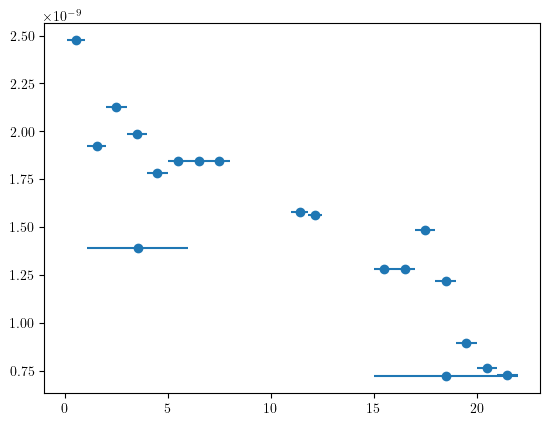

In [4]:
plt.errorbar(bins_x_LHCb, bins_uncy_LHCb, xerr=bins_uncx_LHCb, fmt='o')

# $c_{a\Phi}$ ($c_W = c_B = 0$)

In [22]:
couplings = {'caPhi': 1}

Text(0.8, 1e-22, '$\\frac{|c_{a\\Phi}|}{f_a} = $ 1 TeV$^{-1}$')

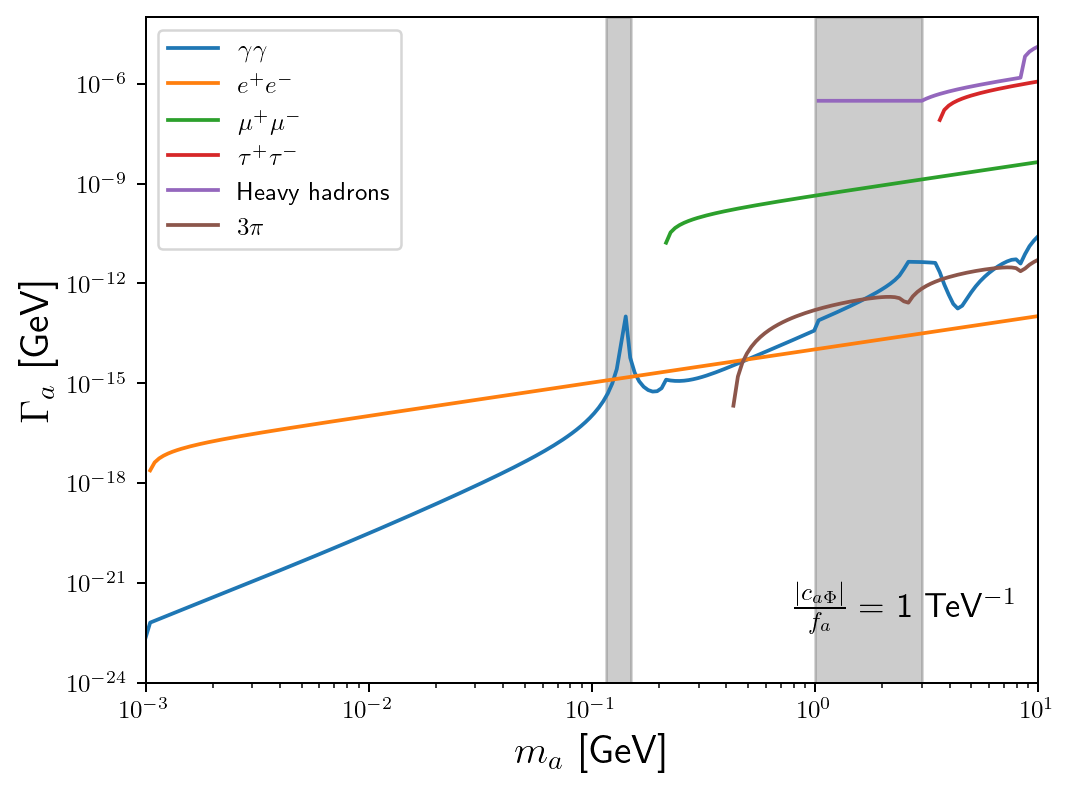

In [23]:
plt.figure(dpi=180)
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_agamma(10**x, couplings) for x in np.linspace(-3, 1, 200)], label=r'$\gamma\gamma$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_aferm(10**x, me, couplings) for x in np.linspace(-3, 1, 200)], label=r'$e^+e^-$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_aferm(10**x, mmu, couplings) for x in np.linspace(-3, 1, 200)], label=r'$\mu^+\mu^-$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_aferm(10**x, mtau, couplings) for x in np.linspace(-3, 1, 200)], label=r'$\tau^+\tau^-$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_aheavyq(10**x, couplings) for x in np.linspace(-3, 1, 200)], label='Heavy hadrons')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_3pi0(10**x, couplings)+Gamma_3pipm(10**x, couplings) for x in np.linspace(-3, 1, 200)], label=r'$3\pi$')
plt.fill_betweenx([1e-24, 1e-4], [1, 1], [3, 3], color='k', alpha=0.2)
plt.fill_betweenx([1e-24, 1e-4], [0.115, 0.115], [0.150, 0.150], color='k', alpha=0.2)
plt.ylim(1e-24, 1e-4)
plt.xlim(1e-3, 10)
plt.legend()
plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$\Gamma_a$ [GeV]', fontsize=16)
plt.annotate(r'$\frac{|c_{a\Phi}|}{f_a} = $ 1 TeV$^{-1}$', (0.8, 1e-22), fontsize=14)

(1e-09, 1.2)

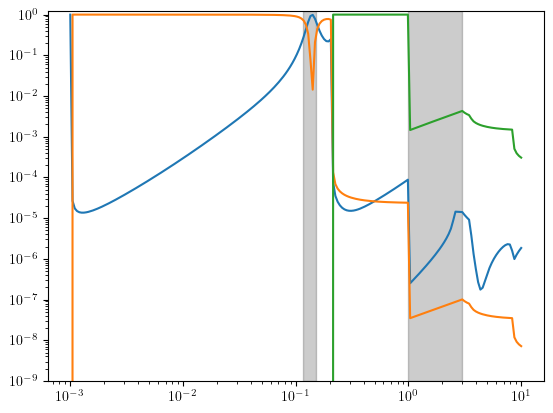

In [24]:
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [BR_agamma(10**x, couplings) for x in np.linspace(-3, 1, 200)])
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [BR_ae(10**x, couplings) for x in np.linspace(-3, 1, 200)])
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [BR_amu(10**x, couplings) for x in np.linspace(-3, 1, 200)])
plt.fill_betweenx([1e-9, 1.2], [1, 1], [3, 3], color='k', alpha=0.2)
plt.fill_betweenx([1e-9, 1.2], [0.115, 0.115], [0.150, 0.150], color='k', alpha=0.2)
plt.ylim(1e-9, 1.2)

In [25]:
Nsigma = 2

ma_err_LHCb = []
cW_err_LHCb = []
for i in range(len(data_BR['LHCb2014']['values'])):
    if i>2 and data_BR['LHCb2014']['values'][i]['q2min'] != data_BR['LHCb2014']['values'][i-1]['q2max']:
        ma_err_LHCb.append(data_BR['LHCb2014']['values'][i-1]['q2max']**0.5*1.001)
        ma_err_LHCb.append(data_BR['LHCb2014']['values'][i]['q2min']**0.5*0.999)
        cW_err_LHCb.append(float('nan'))
        cW_err_LHCb.append(float('nan'))
    q2min = data_BR['LHCb2014']['values'][i]['q2min']
    q2max = data_BR['LHCb2014']['values'][i]['q2max']
    BR_exp_err =  Nsigma*bins_uncy_LHCb[i]
    for ma in np.linspace(q2min**0.5, q2max**0.5, 50):
        deltaBR = BR_BKmumu(ma, couplings)
        ma_err_LHCb.append(ma)
        cW_err_LHCb.append(np.sqrt(BR_exp_err/deltaBR))

In [26]:
lim_KLmumu = 6.84e-9+2*0.11e-9

In [27]:
BR_KL_quad(0.01, mmu, couplings)

3.1457804245199636e-12

/tmp/ipykernel_27834/3211327169.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  plt.loglog(np.linspace(2*mmu, mK-mpi_pm, 100), [(Nsigma*0.6e-8/(BR_Kpimumu(ma, couplings)))**0.5 for ma in np.linspace(2*mmu, mK-mpi_pm, 100)], label=r'$K^+\to \pi^+\mu^+\mu^-$')
/tmp/ipykernel_27834/3211327169.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  plt.loglog([10**x for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], [(lim_Kpiee/(BR_Kpiee(10**x, couplings)))**0.5 for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], label=r'$K^+\to \pi^+e^+e^-$')


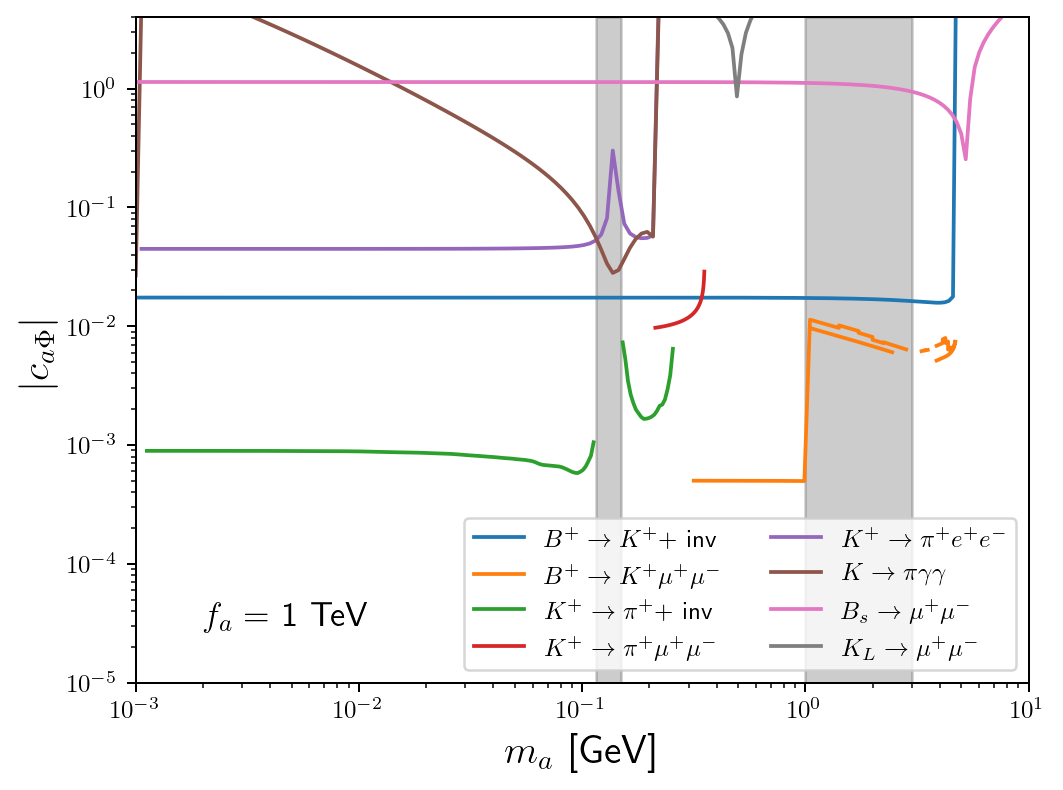

In [28]:

plt.figure(dpi=180)
plt.loglog([10**x for x in np.linspace(-3, np.log10(mB-mK), 200)], [(lim_BKinv/BR_BKa(10**x, couplings))**0.5  for x in np.linspace(-3, np.log10(mB-mK), 200)], label=r'$B^+\to K^+ + $ inv')
plt.loglog(ma_err_LHCb, np.sqrt(Nsigma)*np.array(cW_err_LHCb), label=r'$B^+ \to K^+ \mu^+ \mu^-$')
plt.loglog([10**x for x in np.linspace(-2.95, np.log10(0.255), 200)], [(lim_Kpiinv(10**x)/BR_Kpia(10**x, couplings))**0.5  for x in np.linspace(-2.95, np.log10(0.255), 200)], label=r'$K^+ \to \pi^+ +$ inv')
plt.loglog(np.linspace(2*mmu, mK-mpi_pm, 100), [(Nsigma*0.6e-8/(BR_Kpimumu(ma, couplings)))**0.5 for ma in np.linspace(2*mmu, mK-mpi_pm, 100)], label=r'$K^+\to \pi^+\mu^+\mu^-$')
plt.loglog([10**x for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], [(lim_Kpiee/(BR_Kpiee(10**x, couplings)))**0.5 for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], label=r'$K^+\to \pi^+e^+e^-$')
plt.loglog([10**x for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], [(lim_Kpigammagamma/(BR_Kpigamma(10**x, couplings)))**0.5 for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], label=r'$K\to \pi\gamma\gamma$')
#plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [(lim_KLmumu/(BR_KL_quad(10**x, mmu, couplings)))**0.5 for x in np.linspace(-3, 1, 200)], label=r'$K_L\to \mu\mu$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [lim_Bsmumu(10**x, couplings) for x in np.linspace(-3, 1, 200)], label=r'$B_s\to\mu^+\mu^-$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [(lim_KLmumu/BR_KL_quad(10**x, mmu, couplings))**0.25  for x in np.linspace(-3, 1, 200)], label=r'$K_L \to \mu^+\mu^-$')
plt.ylim(1e-5, 4)
plt.xlim(1e-3, 10)
plt.fill_betweenx([1e-5, 4], [1, 1], [3, 3], color='k', alpha=0.2)
plt.fill_betweenx([1e-5, 4], [0.115, 0.115], [0.150, 0.150], color='k', alpha=0.2)
plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_{a\Phi}|$', fontsize=16)
plt.annotate(r'$f_a = $ 1 TeV', (0.2e-2, 0.3e-4), fontsize=14)
plt.legend(loc='lower right', ncols=2)
plt.savefig('plots/mesondecays_caPhi.png')

# $c_W$ ($c_{a\Phi} = c_B = 0$)

In [12]:
couplings = {'cW': 1}

Text(0.8, 1e-22, '$\\frac{|c_W|}{f_a} = $ 1 TeV$^{-1}$')

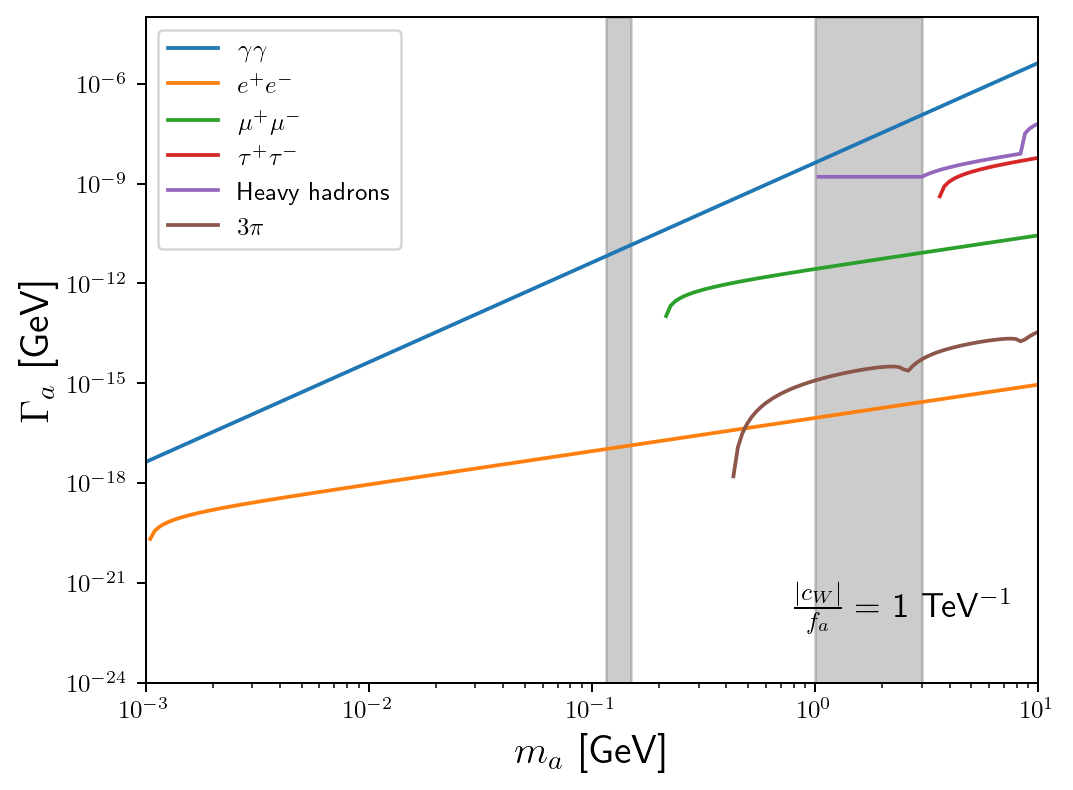

In [13]:
plt.figure(dpi=180)
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_agamma(10**x, couplings) for x in np.linspace(-3, 1, 200)], label=r'$\gamma\gamma$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_aferm(10**x, me, couplings) for x in np.linspace(-3, 1, 200)], label=r'$e^+e^-$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_aferm(10**x, mmu, couplings) for x in np.linspace(-3, 1, 200)], label=r'$\mu^+\mu^-$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_aferm(10**x, mtau, couplings) for x in np.linspace(-3, 1, 200)], label=r'$\tau^+\tau^-$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_aheavyq(10**x, couplings) for x in np.linspace(-3, 1, 200)], label='Heavy hadrons')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_3pi0(10**x, couplings)+Gamma_3pipm(10**x, couplings) for x in np.linspace(-3, 1, 200)], label=r'$3\pi$')
plt.fill_betweenx([1e-24, 1e-4], [1, 1], [3, 3], color='k', alpha=0.2)
plt.fill_betweenx([1e-24, 1e-4], [0.115, 0.115], [0.150, 0.150], color='k', alpha=0.2)
plt.ylim(1e-24, 1e-4)
plt.xlim(1e-3, 10)
plt.legend()
plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$\Gamma_a$ [GeV]', fontsize=16)
plt.annotate(r'$\frac{|c_W|}{f_a} = $ 1 TeV$^{-1}$', (0.8, 1e-22), fontsize=14)

(1e-09, 1.2)

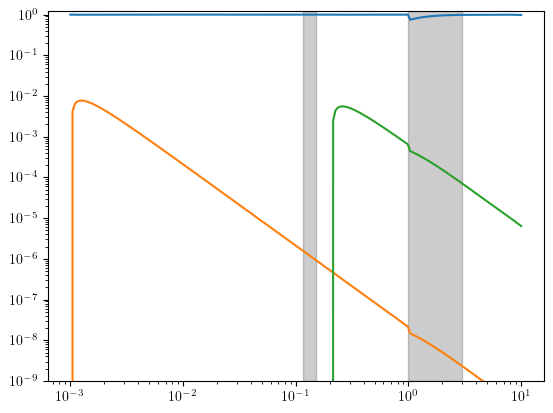

In [14]:
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [BR_agamma(10**x, couplings) for x in np.linspace(-3, 1, 200)])
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [BR_ae(10**x, couplings) for x in np.linspace(-3, 1, 200)])
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [BR_amu(10**x, couplings) for x in np.linspace(-3, 1, 200)])
plt.fill_betweenx([1e-9, 1.2], [1, 1], [3, 3], color='k', alpha=0.2)
plt.fill_betweenx([1e-9, 1.2], [0.115, 0.115], [0.150, 0.150], color='k', alpha=0.2)
plt.ylim(1e-9, 1.2)

In [15]:
Nsigma = 2

ma_err_LHCb = []
cW_err_LHCb = []
for i in range(len(data_BR['LHCb2014']['values'])):
    if i>2 and data_BR['LHCb2014']['values'][i]['q2min'] != data_BR['LHCb2014']['values'][i-1]['q2max']:
        ma_err_LHCb.append(data_BR['LHCb2014']['values'][i-1]['q2max']**0.5*1.001)
        ma_err_LHCb.append(data_BR['LHCb2014']['values'][i]['q2min']**0.5*0.999)
        cW_err_LHCb.append(float('nan'))
        cW_err_LHCb.append(float('nan'))
    q2min = data_BR['LHCb2014']['values'][i]['q2min']
    q2max = data_BR['LHCb2014']['values'][i]['q2max']
    BR_exp_err =  Nsigma*bins_uncy_LHCb[i]
    for ma in np.linspace(q2min**0.5, q2max**0.5, 50):
        deltaBR = BR_BKmumu(ma, couplings)
        ma_err_LHCb.append(ma)
        cW_err_LHCb.append(np.sqrt(BR_exp_err/deltaBR))

/tmp/ipykernel_27834/3582290332.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  plt.loglog(np.linspace(2*mmu, mK-mpi_pm, 100), [(Nsigma*0.6e-8/(BR_Kpimumu(ma, couplings)))**0.5 for ma in np.linspace(2*mmu, mK-mpi_pm, 100)], label=r'$K^+\to \pi^+\mu^+\mu^-$')
/tmp/ipykernel_27834/3582290332.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  plt.loglog([10**x for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], [(lim_Kpiee/(BR_Kpiee(10**x, couplings)))**0.5 for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], label=r'$K^+\to \pi^+e^+e^-$')


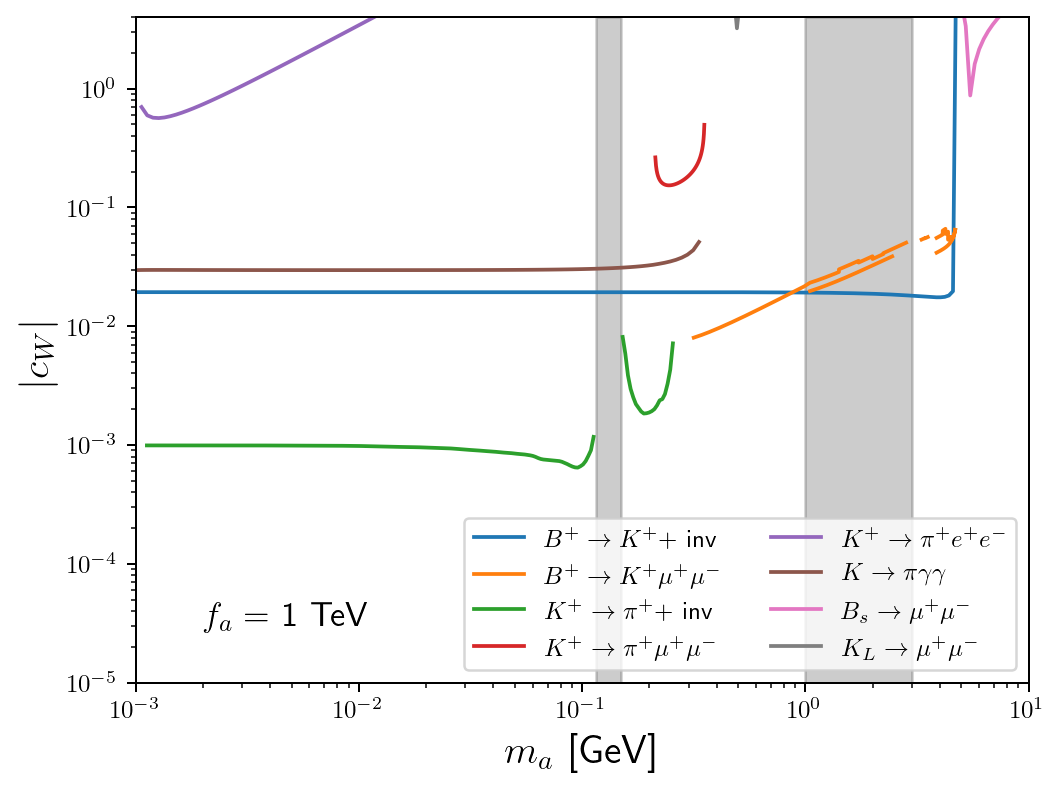

In [16]:

plt.figure(dpi=180)
plt.loglog([10**x for x in np.linspace(-3, np.log10(mB-mK), 200)], [(lim_BKinv/BR_BKa(10**x, couplings))**0.5  for x in np.linspace(-3, np.log10(mB-mK), 200)], label=r'$B^+\to K^+ + $ inv')
plt.loglog(ma_err_LHCb, np.sqrt(Nsigma)*np.array(cW_err_LHCb), label=r'$B^+ \to K^+ \mu^+ \mu^-$')
plt.loglog([10**x for x in np.linspace(-2.95, np.log10(0.255), 200)], [(lim_Kpiinv(10**x)/BR_Kpia(10**x, couplings))**0.5  for x in np.linspace(-2.95, np.log10(0.255), 200)], label=r'$K^+ \to \pi^+ +$ inv')
plt.loglog(np.linspace(2*mmu, mK-mpi_pm, 100), [(Nsigma*0.6e-8/(BR_Kpimumu(ma, couplings)))**0.5 for ma in np.linspace(2*mmu, mK-mpi_pm, 100)], label=r'$K^+\to \pi^+\mu^+\mu^-$')
plt.loglog([10**x for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], [(lim_Kpiee/(BR_Kpiee(10**x, couplings)))**0.5 for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], label=r'$K^+\to \pi^+e^+e^-$')
plt.loglog([10**x for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], [(lim_Kpigammagamma/(BR_Kpigamma(10**x, couplings)))**0.5 for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], label=r'$K\to \pi\gamma\gamma$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [lim_Bsmumu(10**x, couplings) for x in np.linspace(-3, 1, 200)], label=r'$B_s\to\mu^+\mu^-$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [(lim_KLmumu/BR_KL_quad(10**x, mmu, couplings))**0.25  for x in np.linspace(-3, 1, 200)], label=r'$K_L \to \mu^+\mu^-$')
plt.ylim(1e-5, 4)
plt.xlim(1e-3, 10)
plt.fill_betweenx([1e-5, 4], [1, 1], [3, 3], color='k', alpha=0.2)
plt.fill_betweenx([1e-5, 4], [0.115, 0.115], [0.150, 0.150], color='k', alpha=0.2)
plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_W|$', fontsize=16)
plt.annotate(r'$f_a = $ 1 TeV', (0.2e-2, 0.3e-4), fontsize=14)
plt.legend(loc='lower right', ncols=2)
plt.savefig('plots/mesondecays_cW.png')

In [17]:
couplings = {'cB': 1, 'cW': 1}

Text(0.8, 1e-22, '$\\frac{|c_V|}{f_a} = $ 1 TeV$^{-1}$')

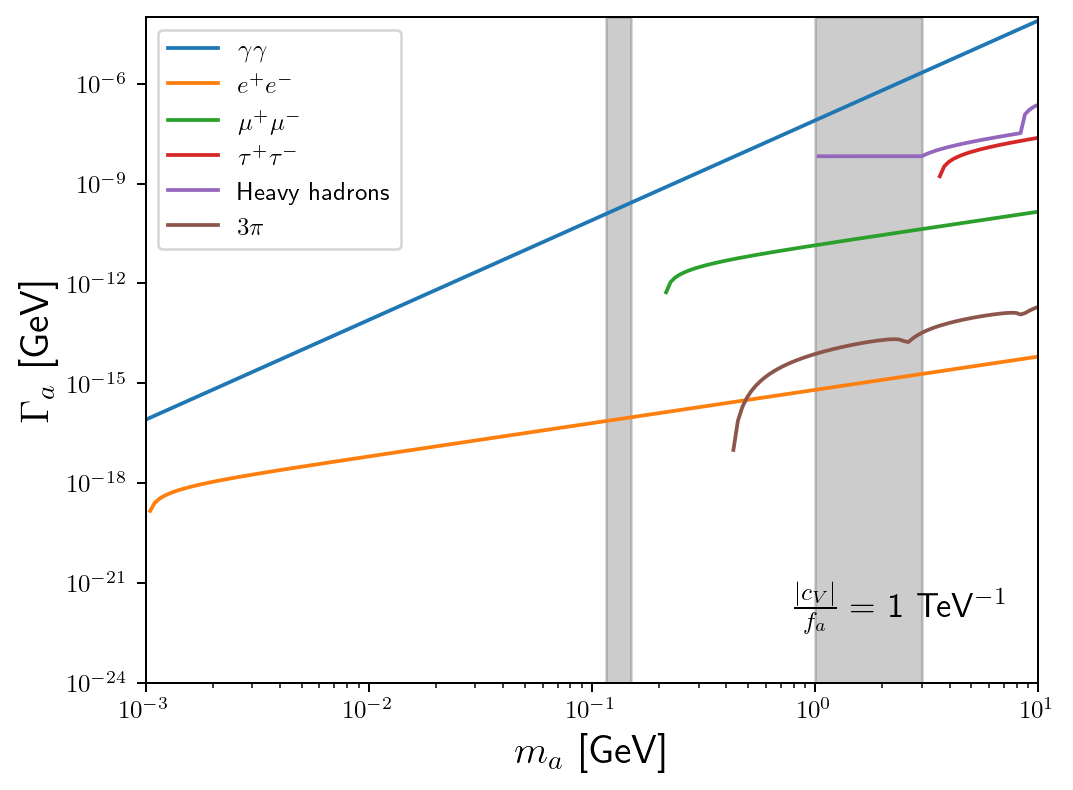

In [18]:
plt.figure(dpi=180)
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_agamma(10**x, couplings) for x in np.linspace(-3, 1, 200)], label=r'$\gamma\gamma$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_aferm(10**x, me, couplings) for x in np.linspace(-3, 1, 200)], label=r'$e^+e^-$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_aferm(10**x, mmu, couplings) for x in np.linspace(-3, 1, 200)], label=r'$\mu^+\mu^-$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_aferm(10**x, mtau, couplings) for x in np.linspace(-3, 1, 200)], label=r'$\tau^+\tau^-$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_aheavyq(10**x, couplings) for x in np.linspace(-3, 1, 200)], label='Heavy hadrons')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [Gamma_3pi0(10**x, couplings)+Gamma_3pipm(10**x, couplings) for x in np.linspace(-3, 1, 200)], label=r'$3\pi$')
plt.fill_betweenx([1e-24, 1e-4], [1, 1], [3, 3], color='k', alpha=0.2)
plt.fill_betweenx([1e-24, 1e-4], [0.115, 0.115], [0.150, 0.150], color='k', alpha=0.2)
plt.ylim(1e-24, 1e-4)
plt.xlim(1e-3, 10)
plt.legend()
plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$\Gamma_a$ [GeV]', fontsize=16)
plt.annotate(r'$\frac{|c_V|}{f_a} = $ 1 TeV$^{-1}$', (0.8, 1e-22), fontsize=14)

(1e-09, 1.2)

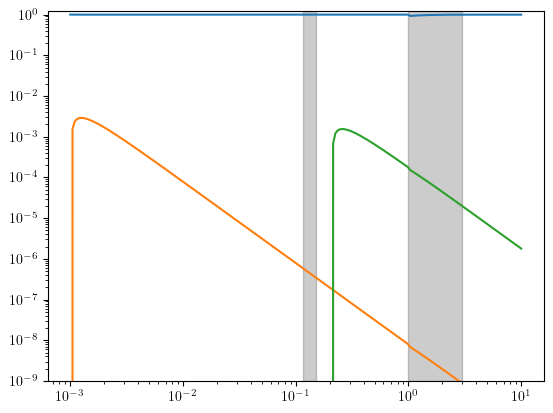

In [19]:
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [BR_agamma(10**x, couplings) for x in np.linspace(-3, 1, 200)])
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [BR_ae(10**x, couplings) for x in np.linspace(-3, 1, 200)])
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [BR_amu(10**x, couplings) for x in np.linspace(-3, 1, 200)])
plt.fill_betweenx([1e-9, 1.2], [1, 1], [3, 3], color='k', alpha=0.2)
plt.fill_betweenx([1e-9, 1.2], [0.115, 0.115], [0.150, 0.150], color='k', alpha=0.2)
plt.ylim(1e-9, 1.2)

In [20]:
Nsigma = 2

ma_err_LHCb = []
cW_err_LHCb = []
for i in range(len(data_BR['LHCb2014']['values'])):
    if i>2 and data_BR['LHCb2014']['values'][i]['q2min'] != data_BR['LHCb2014']['values'][i-1]['q2max']:
        ma_err_LHCb.append(data_BR['LHCb2014']['values'][i-1]['q2max']**0.5*1.001)
        ma_err_LHCb.append(data_BR['LHCb2014']['values'][i]['q2min']**0.5*0.999)
        cW_err_LHCb.append(float('nan'))
        cW_err_LHCb.append(float('nan'))
    q2min = data_BR['LHCb2014']['values'][i]['q2min']
    q2max = data_BR['LHCb2014']['values'][i]['q2max']
    BR_exp_err =  Nsigma*bins_uncy_LHCb[i]
    for ma in np.linspace(q2min**0.5, q2max**0.5, 50):
        deltaBR = BR_BKmumu(ma, couplings)
        ma_err_LHCb.append(ma)
        cW_err_LHCb.append(np.sqrt(BR_exp_err/deltaBR))

/tmp/ipykernel_27834/3069304539.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  plt.loglog(np.linspace(2*mmu, mK-mpi_pm, 100), [(Nsigma*0.6e-8/(BR_Kpimumu(ma, couplings)))**0.5 for ma in np.linspace(2*mmu, mK-mpi_pm, 100)], label=r'$K^+\to \pi^+\mu^+\mu^-$')
/tmp/ipykernel_27834/3069304539.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  plt.loglog([10**x for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], [(lim_Kpiee/(BR_Kpiee(10**x, couplings)))**0.5 for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], label=r'$K^+\to \pi^+e^+e^-$')


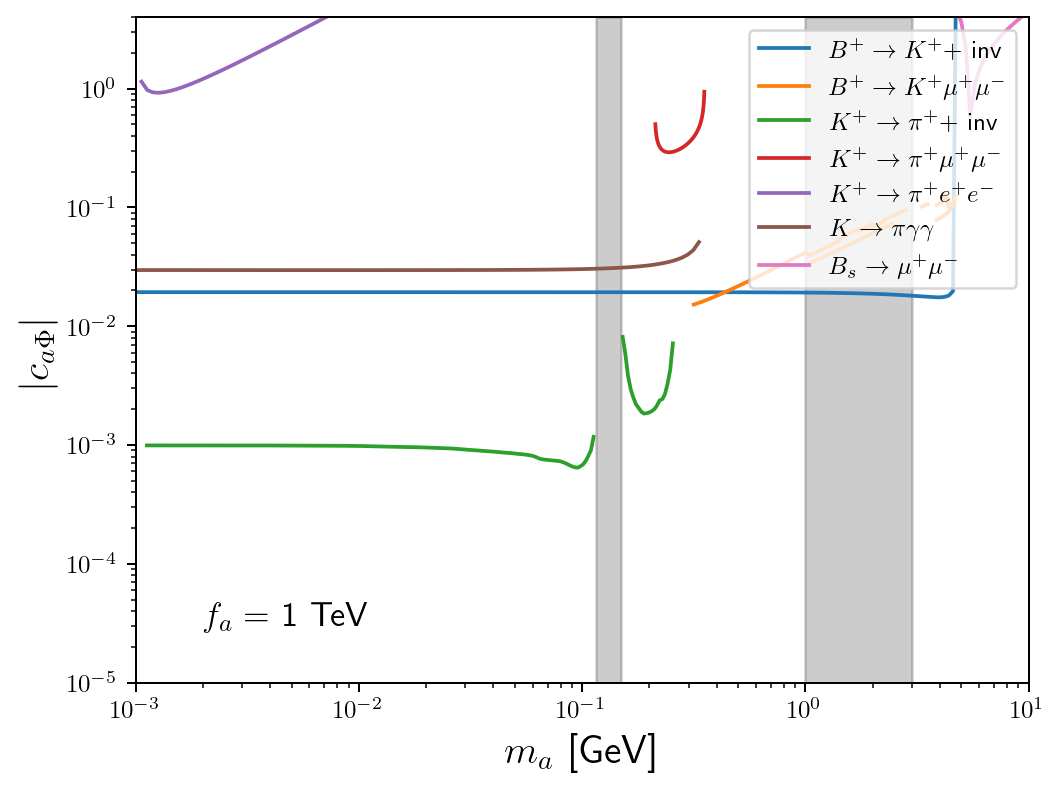

In [21]:
plt.figure(dpi=180)
plt.loglog([10**x for x in np.linspace(-3, np.log10(mB-mK), 200)], [(lim_BKinv/BR_BKa(10**x, couplings))**0.5  for x in np.linspace(-3, np.log10(mB-mK), 200)], label=r'$B^+\to K^+ + $ inv')
plt.loglog(ma_err_LHCb, np.sqrt(Nsigma)*np.array(cW_err_LHCb), label=r'$B^+ \to K^+ \mu^+ \mu^-$')
plt.loglog([10**x for x in np.linspace(-2.95, np.log10(0.255), 200)], [(lim_Kpiinv(10**x)/BR_Kpia(10**x, couplings))**0.5  for x in np.linspace(-2.95, np.log10(0.255), 200)], label=r'$K^+ \to \pi^+ +$ inv')
plt.loglog(np.linspace(2*mmu, mK-mpi_pm, 100), [(Nsigma*0.6e-8/(BR_Kpimumu(ma, couplings)))**0.5 for ma in np.linspace(2*mmu, mK-mpi_pm, 100)], label=r'$K^+\to \pi^+\mu^+\mu^-$')
plt.loglog([10**x for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], [(lim_Kpiee/(BR_Kpiee(10**x, couplings)))**0.5 for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], label=r'$K^+\to \pi^+e^+e^-$')
plt.loglog([10**x for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], [(lim_Kpigammagamma/(BR_Kpigamma(10**x, couplings)))**0.5 for x in np.linspace(-3, np.log10(mK-mpi_pm), 100)], label=r'$K\to \pi\gamma\gamma$')
plt.loglog([10**x for x in np.linspace(-3, 1, 200)], [lim_Bsmumu(10**x, couplings) for x in np.linspace(-3, 1, 200)], label=r'$B_s\to\mu^+\mu^-$')
plt.ylim(1e-5, 4)
plt.xlim(1e-3, 10)
plt.fill_betweenx([1e-5, 4], [1, 1], [3, 3], color='k', alpha=0.2)
plt.fill_betweenx([1e-5, 4], [0.115, 0.115], [0.150, 0.150], color='k', alpha=0.2)
plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_{a\Phi}|$', fontsize=16)
plt.annotate(r'$f_a = $ 1 TeV', (0.2e-2, 0.3e-4), fontsize=14)
plt.legend(loc='upper right')
plt.savefig('plmesondecays_cV.png')